# Imports

In [1]:
import hes1_langevin_Antoine as langevin
import hes1_master_Antoine as master
import hes1_utils_Antoine as utils
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as spinter
import scipy.fft
import time

import warnings
warnings.filterwarnings("ignore")

# Some plots of trajectories

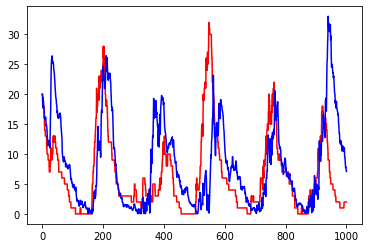

In [2]:
tm,Mm,Pm=master.one_trajectory(tau=25,lambda_s=0.1,Omega=1,P_0=100)
tl,Ml,Pl=langevin.one_trajectory(tau=25,lambda_s=0.1,Omega=1,P_0=100,drift="new")
plt.plot(tm,Mm,color="red")
plt.plot(tl,Ml,color="blue")

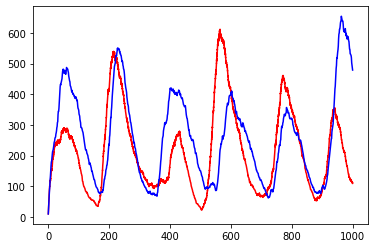

In [3]:
plt.plot(tm,Pm,color="red")
plt.plot(tl,Pl,color="blue")

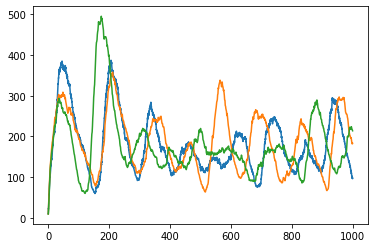

In [4]:
tm,Mm,Pm=master.one_trajectory(lambda_s=1,tau=18.5,P_0=100,h=5,T=1000)
tl,Ml,Pl=langevin.one_trajectory(lambda_s=1,tau=18.5,P_0=100,h=5,T=1000,drift="classical")
_,Mln,Pln=langevin.one_trajectory(lambda_s=1,tau=18.5,P_0=100,h=5,T=1000,drift="new")

plt.plot(tm,Pm)
plt.plot(tl,Pl)
plt.plot(tl,Pln)

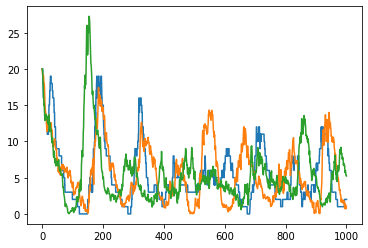

In [5]:
plt.plot(tm,Mm)
plt.plot(tl,Ml)
plt.plot(tl,Mln)

# Transient regime

## Research of the mean behaviour

In [6]:
n_iter=500
tl,table_M,table_P=langevin.multiple_trajectories(n_iter=n_iter,lambda_s=0.1,tau=25,P_0=1000,h=5,M_init=3,T=5000,delta_t=1,Omega=1)

Ml=np.mean(table_M,axis=0)
Pl=np.mean(table_P,axis=0)

_,power_spectrum_l=utils.compute_power_spectrum(tl,table_P)

In [7]:
n_iter=500
tl,table_M,table_P=langevin.multiple_trajectories(n_iter=n_iter,lambda_s=0.1,tau=25,P_0=1000,h=5,M_init=3,T=5000,delta_t=1,Omega=1,drift="new")

Mln=np.mean(table_M,axis=0)
Pln=np.mean(table_P,axis=0)

_,power_spectrum_ln=utils.compute_power_spectrum(tl,table_P)

In [8]:
n_iter=500
t_ref,table_M,table_P=master.multiple_trajectories(n_iter=n_iter,lambda_s=0.1,tau=25,P_0=1000,h=5,M_init=3,T=5000,Omega=1)

Mm=np.mean(table_M,axis=0)
Pm=np.mean(table_P,axis=0)

In [9]:
_,Mr,Pr=langevin.resolve_ODE(tau=18.5,P_0=1000,h=5,M_init=3,T=5000)

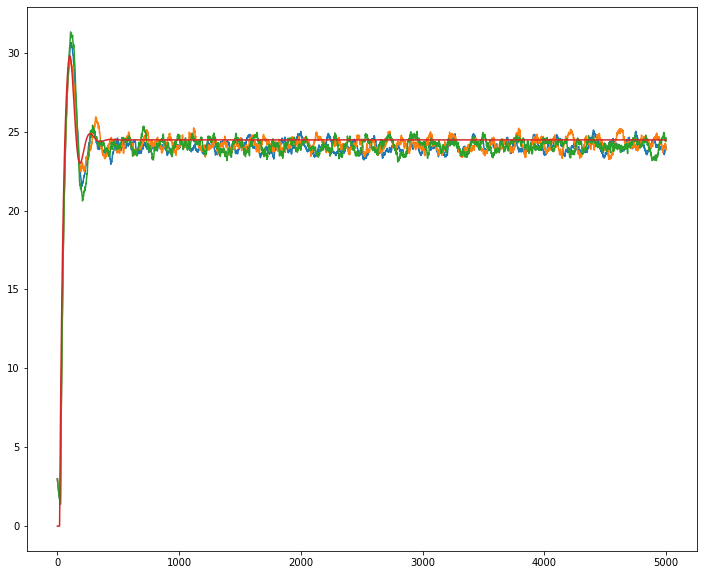

In [10]:
plt.figure(figsize=(12,10))
plt.plot(t_ref,Mm)
plt.plot(tl,Ml)
plt.plot(tl,Mln)
plt.plot(tl,Mr)

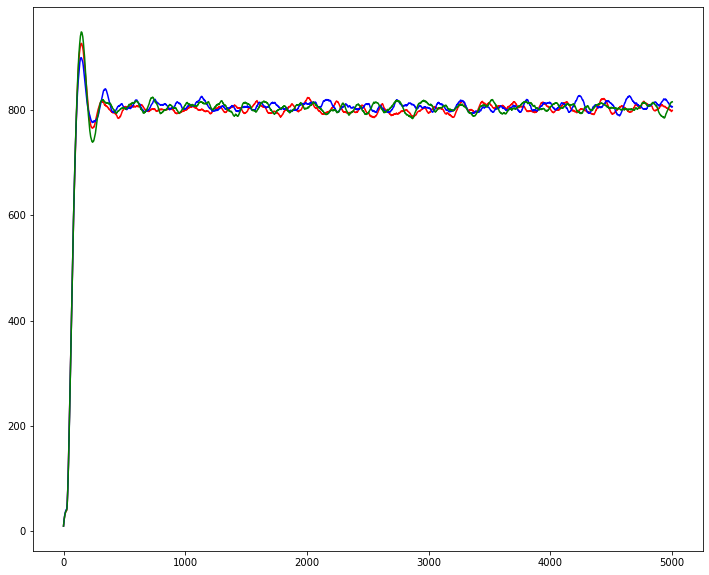

In [11]:
plt.figure(figsize=(12,10))
plt.plot(t_ref,Pm,color="red")
plt.plot(tl,Pl,color="blue")
plt.plot(tl,Pln,color="green")
#plt.plot(tl,Pr)

## Transient power spectrum

In [ ]:
omega,power_spectrum_m=utils.compute_power_spectrum(t_ref,table_P)

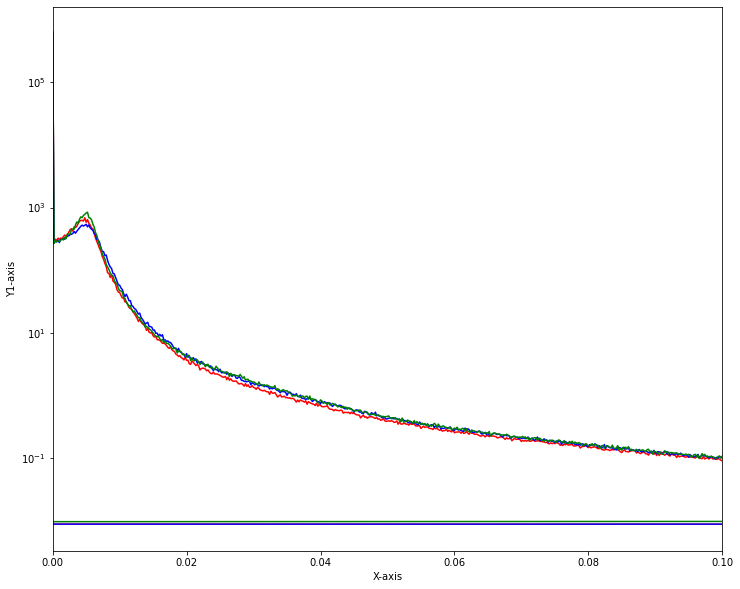

In [12]:
fig, ax1 = plt.subplots(figsize=(12,10)) 

ax1.set_xlabel('X-axis') 
ax1.set_ylabel('Y1-axis') 
ax1.plot(omega, power_spectrum_m , color = 'red')
ax1.plot(omega, power_spectrum_l, color = 'blue')
ax1.plot(omega, power_spectrum_ln, color = 'green')

ax1.tick_params(axis ='y') 
ax1.set_yscale('log')

ax1.set_xlim(0, 0.1)

plt.show()

## Comparison of M & P trajectories

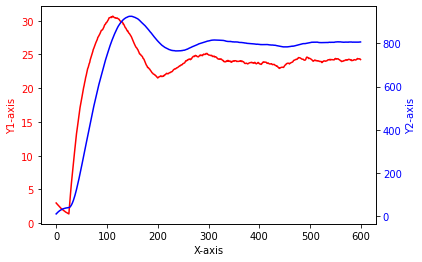

In [15]:
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('X-axis') 
ax1.set_ylabel('Y1-axis', color = 'red') 
ax1.plot(t_ref[:600], Mm[:600], color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Y2-axis', color = 'blue') 
ax2.plot(t_ref[:600], Pm[:600], color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
 
# Show plot

plt.show()

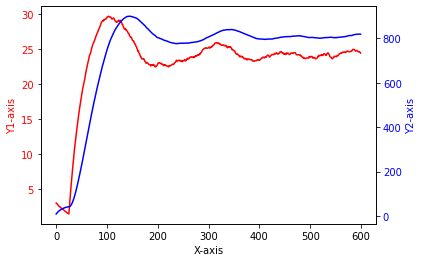

In [16]:
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('X-axis') 
ax1.set_ylabel('Y1-axis', color = 'red') 
ax1.plot(t_ref[:600], Ml[:600], color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Y2-axis', color = 'blue') 
ax2.plot(t_ref[:600], Pl[:600], color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
 
# Show plot

plt.show()

# Pooling values

## First tests, comparison of mean/std

In [17]:
pool_Ml,pool_Pl=langevin.pool_values(n_iter=100,tau=10,lambda_s=0.1,P_0=100,Omega=100)
pool_Mm,pool_Pm=master.pool_values(n_iter=100,tau=10,lambda_s=0.1,P_0=100,Omega=100)

In [19]:
print(np.mean(pool_Mm),np.mean(pool_Ml))
print(np.std(pool_Mm),np.std(pool_Ml))

5.20584 5.2034938854720245
2.99385146298209 2.964629851196832


In [20]:
print(np.mean(pool_Pm),np.mean(pool_Pl))
print(np.std(pool_Pm),np.std(pool_Pl))

173.10993939999997 173.95536064680175
51.43200277592082 49.56787358620846


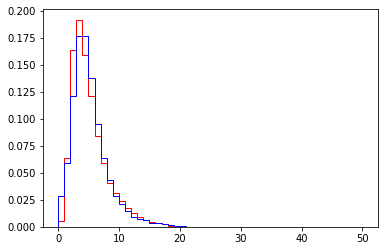

In [22]:
hist_Mm=plt.hist(pool_Mm,bins=50,range=(0,50),histtype='step',density=True,color='red')
hist_Ml=plt.hist(pool_Ml,bins=50,range=(0,50),histtype='step',density=True,color='blue')

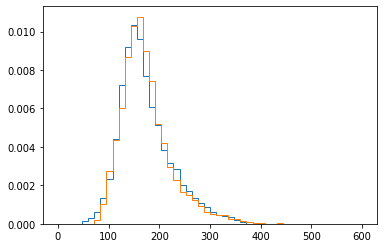

In [23]:
hist_Pm=plt.hist(pool_Pm,bins=50,range=(0,600),histtype='step',density=True)
hist_Pl=plt.hist(pool_Pl,bins=50,range=(0,600),histtype='step',density=True)

In [11]:
pool_Mm,pool_Pm=master.pool_values(n_iter=100,lambda_s=0.1,tau=18.5,P_0=100,h=5,M_init=3,P_init=5)
pool_Ml,pool_Pl=langevin.pool_values(n_iter=100,lambda_s=0.1,tau=18.5,P_0=100,h=5,M_init=3,P_init=5)
pool_Mln,pool_Pln=langevin.pool_values(n_iter=100,lambda_s=0.1,tau=18.5,P_0=100,h=5,M_init=3,P_init=5,drift="new")

In [12]:
np.std(pool_Pm),np.std(pool_Pl),np.std(pool_Pln)

(105.18387068136255, 88.88611065419613, 103.58922033898752)

# Computation of power spectrum, mean, std depending on $\lambda$, $\Omega$, $\tau$

In [3]:
val_lambda=[0.001,0.01,0.1,1,10,100]
val_Omega=[1] #[1,10,100]
val_tau=[0.001, 18.5, 100]  #[0.1,1,10,20,50,100]
n_lambda=np.size(val_lambda)
n_Omega=np.size(val_Omega)
n_tau=np.size(val_tau)

std_Mm=np.zeros((n_lambda,n_Omega,n_tau))
std_Ml=np.zeros((n_lambda,n_Omega,n_tau))
std_Mln=np.zeros((n_lambda,n_Omega,n_tau))

std_Pm=np.zeros((n_lambda,n_Omega,n_tau))
std_Pl=np.zeros((n_lambda,n_Omega,n_tau))
std_Pln=np.zeros((n_lambda,n_Omega,n_tau))

mean_Mm=np.zeros((n_lambda,n_Omega,n_tau))
mean_Ml=np.zeros((n_lambda,n_Omega,n_tau))
mean_Mln=np.zeros((n_lambda,n_Omega,n_tau))

mean_Pm=np.zeros((n_lambda,n_Omega,n_tau))
mean_Pl=np.zeros((n_lambda,n_Omega,n_tau))
mean_Pln=np.zeros((n_lambda,n_Omega,n_tau))

power_spectrum_Mm=np.zeros((n_lambda,n_Omega,n_tau),dtype=np.ndarray)
power_spectrum_Ml=np.zeros((n_lambda,n_Omega,n_tau),dtype=np.ndarray)
power_spectrum_Mln=np.zeros((n_lambda,n_Omega,n_tau),dtype=np.ndarray)

power_spectrum_Pm=np.zeros((n_lambda,n_Omega,n_tau),dtype=np.ndarray)
power_spectrum_Pl=np.zeros((n_lambda,n_Omega,n_tau),dtype=np.ndarray)
power_spectrum_Pln=np.zeros((n_lambda,n_Omega,n_tau),dtype=np.ndarray)

for i in range(n_lambda):
    for j in range(n_Omega):
        for k in range(n_tau):
            
            print("lambda=",val_lambda[i])
            print("Omega=",val_Omega[j])
            print("tau=",val_tau[k])
            
            output=utils.compute_fourier_transform_mean_and_std(n_iter=500,lambda_s=val_lambda[i],        
                                                      P_0=1000,
                                                      tau=val_tau[k],
                                                      P_init=0,
                                                      M_init=0,
                                                      T=2000,
                                                      delta_t=1,
                                                      Omega=val_Omega[j])            
            
            t_ref=output["times"]
            omega_ref=output["frequencies"]
            
            std_Mm[i,j,k]=output["std Mm"]
            std_Ml[i,j,k]=output["std Ml"]
            std_Mln[i,j,k]=output["std Mln"]

            std_Pm[i,j,k]=output["std Pm"]
            std_Pl[i,j,k]=output["std Pl"]
            std_Pln[i,j,k]=output["std Pln"]

            mean_Mm[i,j,k]=output["mean Mm"]
            mean_Ml[i,j,k]=output["mean Ml"]
            mean_Mln[i,j,k]=output["mean Mln"]

            mean_Pm[i,j,k]=output["mean Pm"]
            mean_Pl[i,j,k]=output["mean Pl"]
            mean_Pln[i,j,k]=output["mean Pln"]

            power_spectrum_Mm[i,j,k]=output["power spectrum Mm"]
            power_spectrum_Ml[i,j,k]=output["power spectrum Ml"]
            power_spectrum_Mln[i,j,k]=output["power spectrum Mln"]
            
            power_spectrum_Pm[i,j,k]=output["power spectrum Pm"]
            power_spectrum_Pl[i,j,k]=output["power spectrum Pl"]
            power_spectrum_Pln[i,j,k]=output["power spectrum Pln"]

            print("Done")
            print("\n")
        

lambda= 0.001
Omega= 1
tau= 0.001
Done


lambda= 0.001
Omega= 1
tau= 18.5
Done


lambda= 0.001
Omega= 1
tau= 100
Done


lambda= 0.01
Omega= 1
tau= 0.001
Done


lambda= 0.01
Omega= 1
tau= 18.5
Done


lambda= 0.01
Omega= 1
tau= 100
Done


lambda= 0.1
Omega= 1
tau= 0.001
Done


lambda= 0.1
Omega= 1
tau= 18.5
Done


lambda= 0.1
Omega= 1
tau= 100
Done


lambda= 1
Omega= 1
tau= 0.001
Done


lambda= 1
Omega= 1
tau= 18.5
Done


lambda= 1
Omega= 1
tau= 100
Done


lambda= 10
Omega= 1
tau= 0.001
Done


lambda= 10
Omega= 1
tau= 18.5
Done


lambda= 10
Omega= 1
tau= 100
Done


lambda= 100
Omega= 1
tau= 0.001
Done


lambda= 100
Omega= 1
tau= 18.5
Done


lambda= 100
Omega= 1
tau= 100
Done




### Plot mean

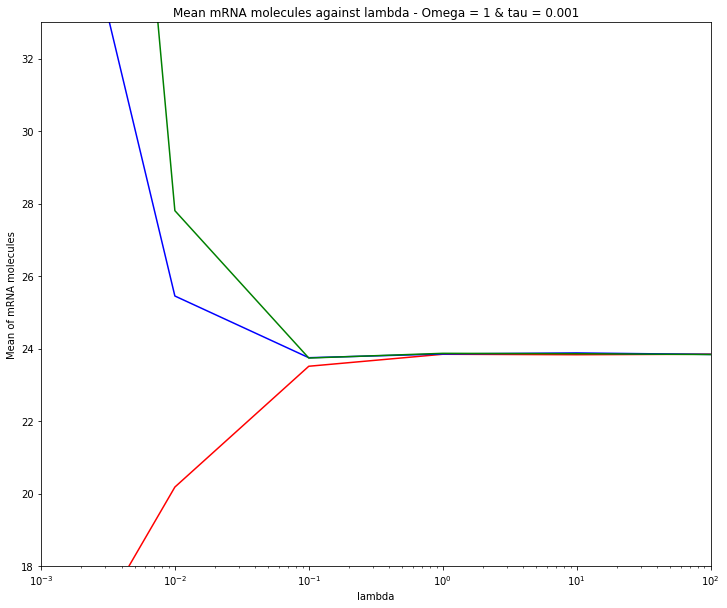

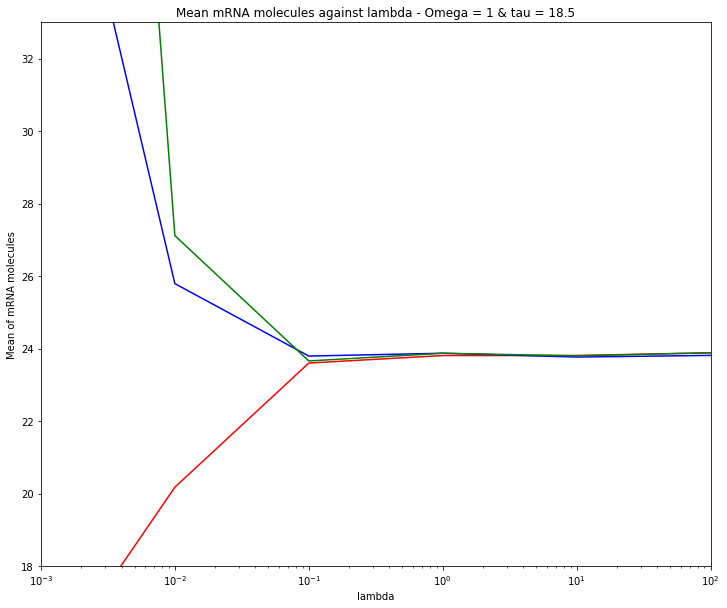

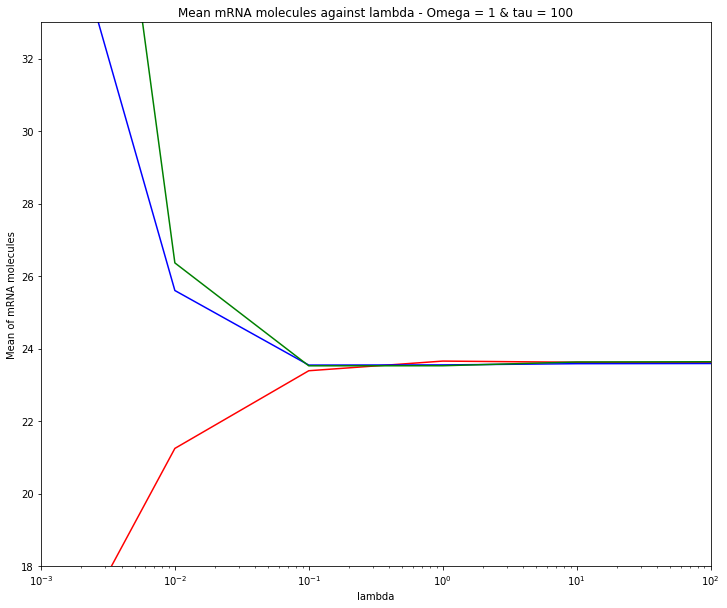

In [5]:
for j in range(n_Omega):
    for k in range(n_tau):
    
        #print('Omega=',val_Omega[j])
        #print('tau=',val_tau[k])
        fig, ax1 = plt.subplots(figsize=(12,10)) 
        
        ax1.set_title('Mean mRNA molecules against lambda - Omega = ' +  str(val_Omega[j]) + ' & tau = ' + str(val_tau[k])) 
        ax1.set_xlabel('lambda') 
        ax1.set_ylabel('Mean of mRNA molecules') 
        
        ax1.plot(val_lambda, mean_Mm[:,j,k], color = 'red') 
        ax1.plot(val_lambda, mean_Ml[:,j,k], color = 'blue')
        ax1.plot(val_lambda, mean_Mln[:,j,k], color = 'green') 
        
        ax1.tick_params(axis ='y') 
        ax1.set_xscale('log')
        
        ax1.set_xlim(0.001,100)
        ax1.set_ylim(18,33)
        
        plt.savefig('plot_mean_M - Omega' +  str(val_Omega[j]) + ' and tau' + str(val_tau[k]) + '.pdf')  
        
        plt.show()

Omega= 1
tau= 0.001


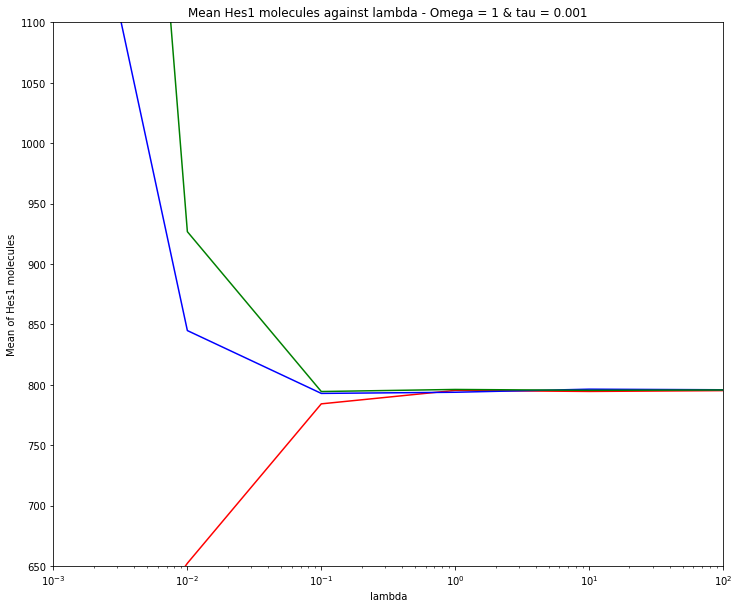

Omega= 1
tau= 18.5


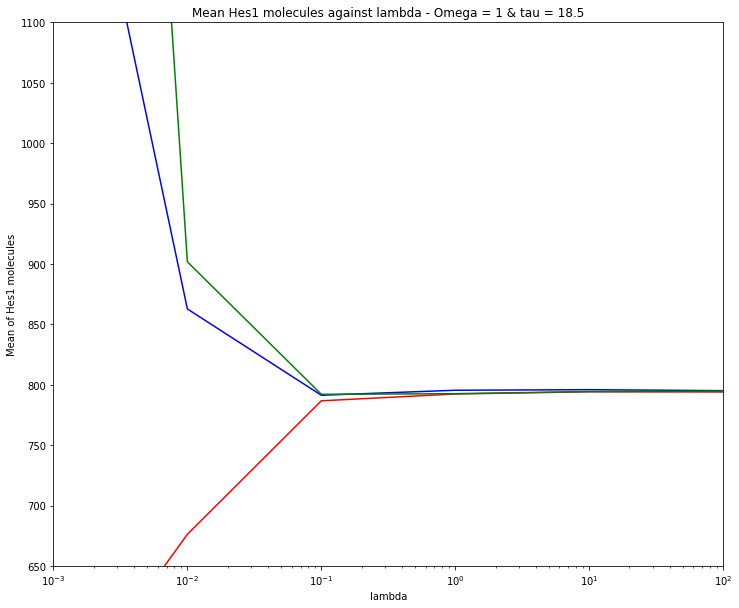

Omega= 1
tau= 100


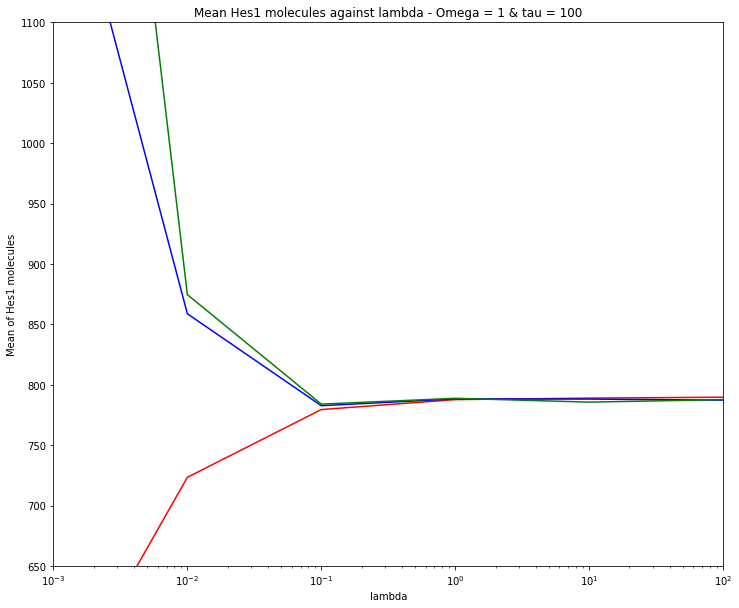

In [18]:
for j in range(n_Omega):
    for k in range(n_tau):
    
        print('Omega=',val_Omega[j])
        print('tau=',val_tau[k])
        fig, ax1 = plt.subplots(figsize=(12,10)) 

        ax1.set_title('Mean Hes1 molecules against lambda - Omega = ' +  str(val_Omega[j]) + ' & tau = ' + str(val_tau[k])) 
        ax1.set_xlabel('lambda') 
        ax1.set_ylabel('Mean of Hes1 molecules') 
        ax1.plot(val_lambda, mean_Pm[:,j,k], color = 'red') 
        ax1.plot(val_lambda, mean_Pl[:,j,k], color = 'blue')
        ax1.plot(val_lambda, mean_Pln[:,j,k], color = 'green') 

        ax1.tick_params(axis ='y') 
        ax1.set_xscale('log')
        ax1.set_xlim(0.001,100)
        ax1.set_ylim(650,1100)

        
        plt.savefig('plot_mean_P - Omega' +  str(val_Omega[j]) + ' and tau' + str(val_tau[k]) + '.pdf')  

        plt.show()

### Plot std

#### Plot std against $\lambda$

Omega= 1
tau= 0.001


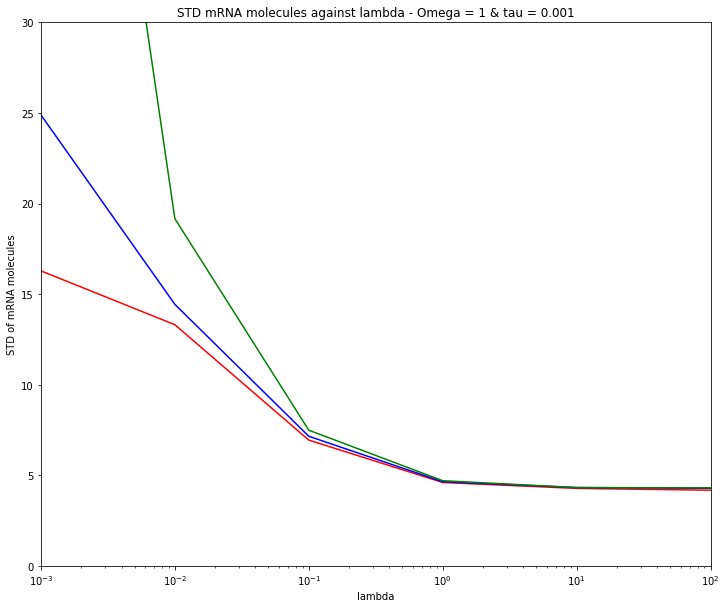

Omega= 1
tau= 18.5


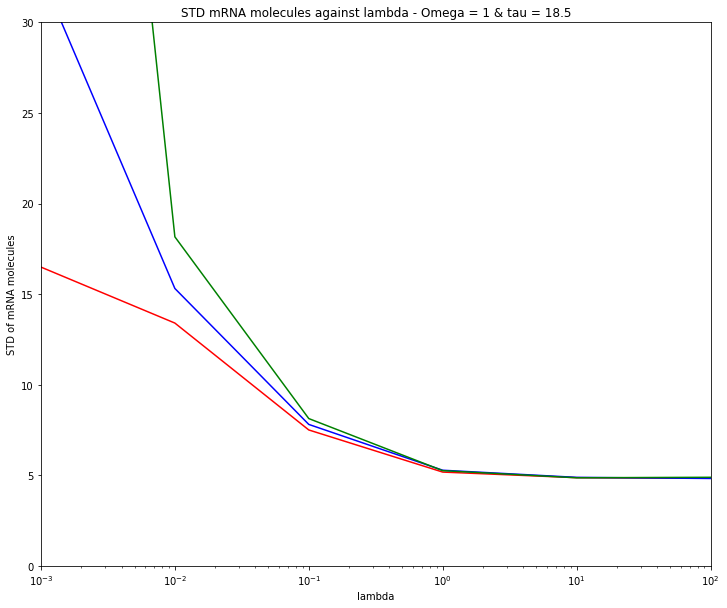

Omega= 1
tau= 100


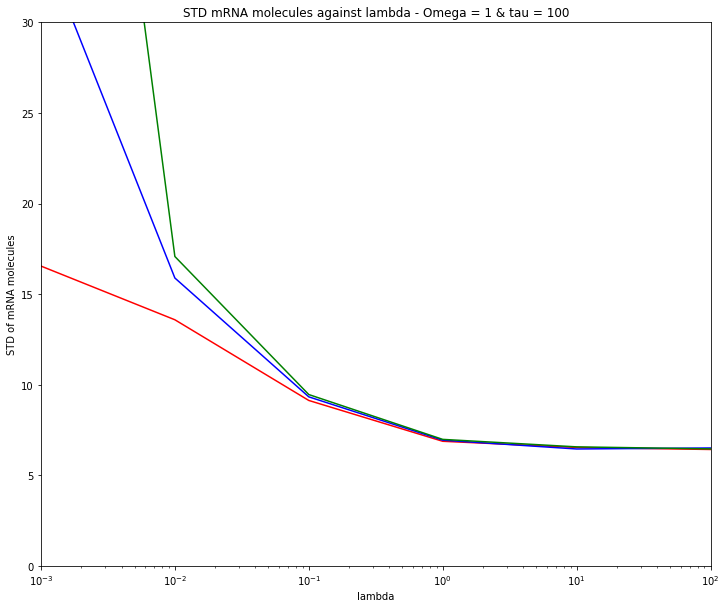

In [19]:
for j in range(n_Omega):
    for k in range(n_tau):
    
        print('Omega=',val_Omega[j])
        print('tau=',val_tau[k])
        fig, ax1 = plt.subplots(figsize=(12,10)) 

        ax1.set_title('STD mRNA molecules against lambda - Omega = ' +  str(val_Omega[j]) + ' & tau = ' + str(val_tau[k])) 
        ax1.set_xlabel('lambda') 
        ax1.set_ylabel('STD of mRNA molecules')  
        ax1.plot(val_lambda, std_Mm[:,j,k], color = 'red') 
        ax1.plot(val_lambda, std_Ml[:,j,k], color = 'blue')
        ax1.plot(val_lambda, std_Mln[:,j,k], color = 'green')

        ax1.tick_params(axis ='y') 
        ax1.set_xscale('log')
        ax1.set_xlim(0.001,100)
        ax1.set_ylim(0,30)

        plt.savefig('plot_std_M - Omega' +  str(val_Omega[j]) + ' and tau' + str(val_tau[k]) + '.pdf')  

        plt.show()

Omega= 1
tau= 0.001


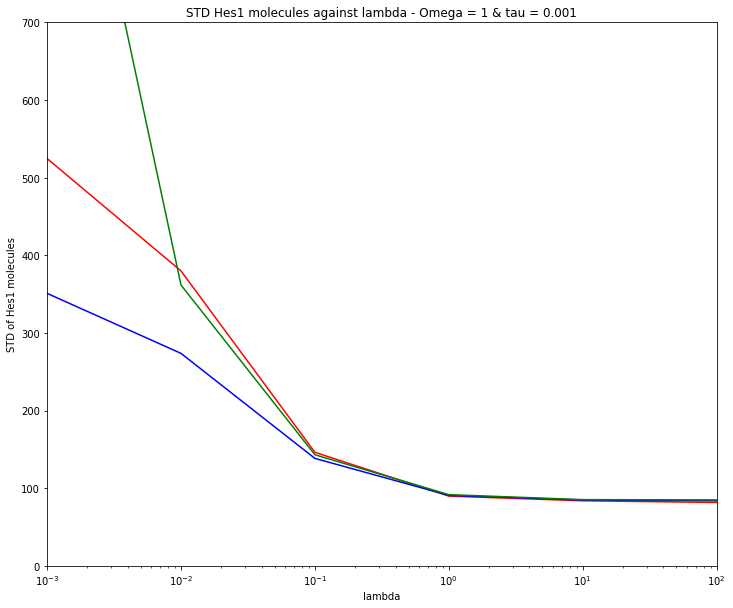

Omega= 1
tau= 18.5


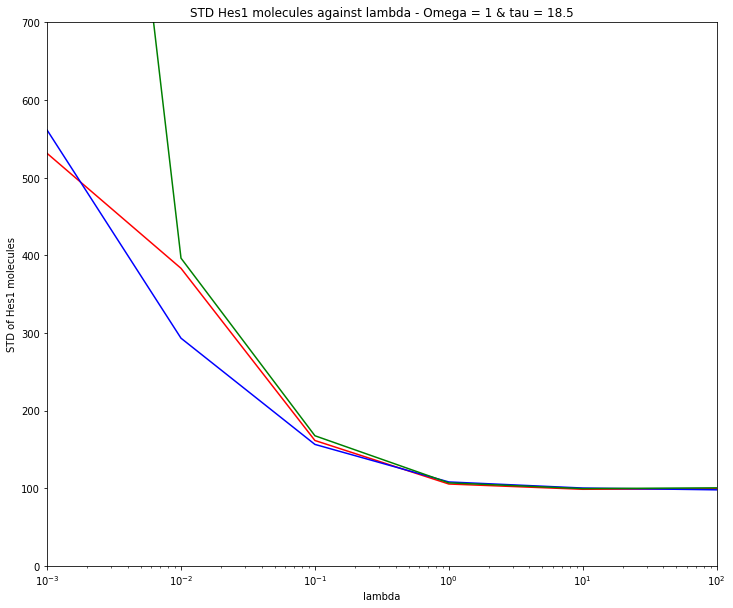

Omega= 1
tau= 100


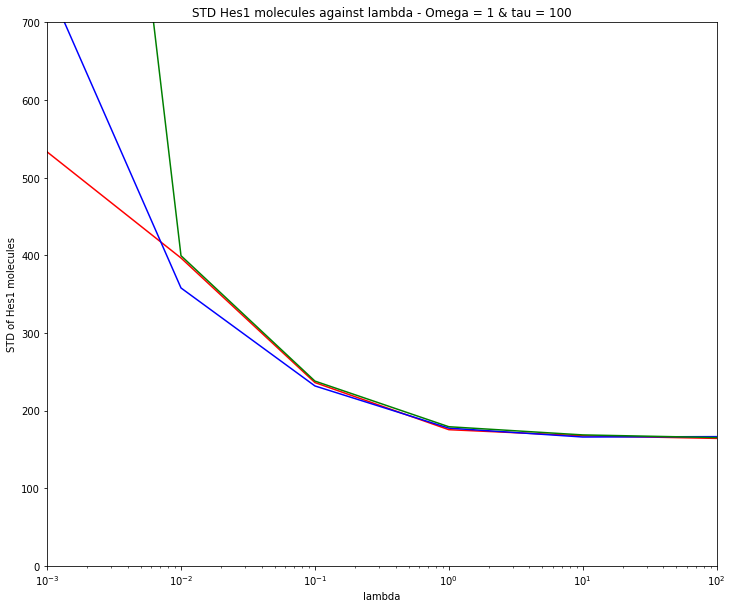

In [20]:
for j in range(n_Omega):
    for k in range(n_tau):
    
        print('Omega=',val_Omega[j])
        print('tau=',val_tau[k])
        fig, ax1 = plt.subplots(figsize=(12,10)) 

        ax1.set_title('STD Hes1 molecules against lambda - Omega = ' +  str(val_Omega[j]) + ' & tau = ' + str(val_tau[k])) 
        ax1.set_xlabel('lambda') 
        ax1.set_ylabel('STD of Hes1 molecules') 
        ax1.plot(val_lambda, std_Pm[:,j,k], color = 'red') 
        ax1.plot(val_lambda, std_Pl[:,j,k], color = 'blue')
        ax1.plot(val_lambda, std_Pln[:,j,k], color = 'green') 

        ax1.tick_params(axis ='y') 
        ax1.set_xscale('log')
        ax1.set_xlim(0.001,100)
        ax1.set_ylim(0,700)
        
        plt.savefig('plot_std_P - Omega' +  str(val_Omega[j]) + ' and tau' + str(val_tau[k]) + '.pdf')  

        plt.show()

#### Plot level curves of std against $\lambda$ and $\Omega$

tau= 0.001


TypeError: Input z must be at least a (2, 2) shaped array, but has shape (6, 1)

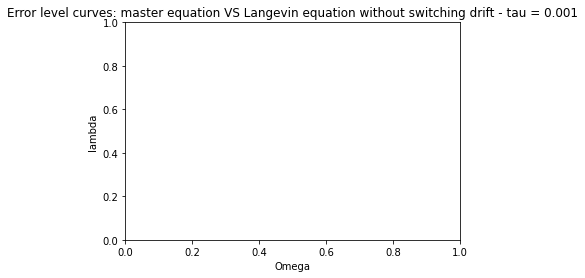

In [21]:
levels=[0.03, 0.05, 0.1, 1, 5]

for k in range(n_tau):
    
        print('tau=',val_tau[k])
        
        fig, ax1 = plt.subplots() 
        ax1.set_title('Error level curves: master equation VS Langevin equation without switching drift - tau = ' + str(val_tau[k])) 
        ax1.set_xlabel('Omega') 
        ax1.set_ylabel('lambda') 
        contours1=ax1.contour(val_Omega, val_lambda, abs(std_Mm[:,:,k] - std_Ml[:,:,k]), cmap = 'copper', levels=levels)
        ax1.tick_params(axis ='y') 
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax1.clabel(contours1,inline=1, fontsize=10)
        plt.savefig('plot_level_curve_std_Mm_vs_Ml - tau' + str(val_tau[k]) + '.pdf')
        plt.show()
        
        fig, ax1 = plt.subplots() 
        ax1.set_title('Error level curves: master equation VS Langevin equation with switching drift - tau = ' + str(val_tau[k])) 
        ax1.set_xlabel('Omega') 
        ax1.set_ylabel('lambda') 
        contours1=ax1.contour(val_Omega, val_lambda, abs(std_Mm[:,:,k] - std_Mln[:,:,k]), cmap = 'cool', levels=levels)
        ax1.tick_params(axis ='y') 
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax1.clabel(contours1,inline=1, fontsize=10)
        plt.savefig('plot_level_curve_std_Mm_vs_Mln - tau' + str(val_tau[k]) + '.pdf')
        plt.show()
        
        fig, ax1 = plt.subplots() 
        ax1.set_title('Superposition of the level curves - tau = ' + str(val_tau[k])) 
        ax1.set_xlabel('Omega') 
        ax1.set_ylabel('lambda') 
        contours1=ax1.contour(val_Omega, val_lambda, abs(std_Mm[:,:,k] - std_Ml[:,:,k]), cmap = 'copper', levels=levels)
        contours2=ax1.contour(val_Omega, val_lambda, abs(std_Mm[:,:,k] - std_Mln[:,:,k]), cmap = 'cool', levels=levels)
        ax1.tick_params(axis ='y') 
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax1.clabel(contours1,inline=1, fontsize=10)
        ax1.clabel(contours2,inline=1, fontsize=10)
        plt.savefig('plot_level_curve_std_superposition_M - tau' + str(val_tau[k]) + '.pdf')
        plt.show()

tau= 0.001


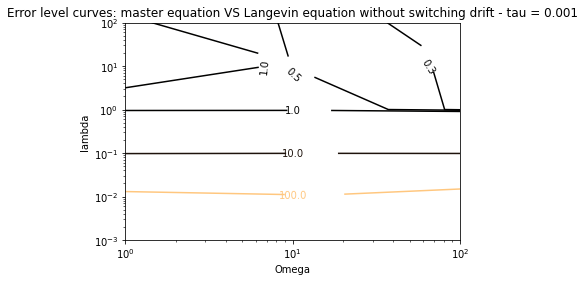

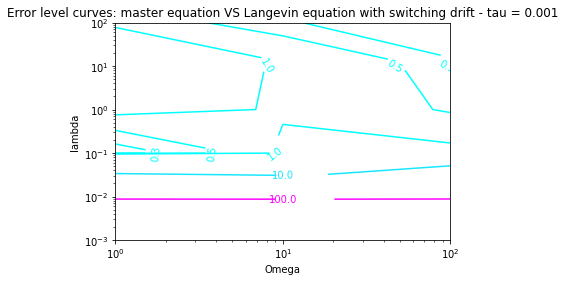

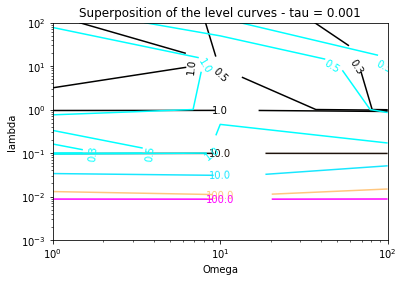

tau= 18.5


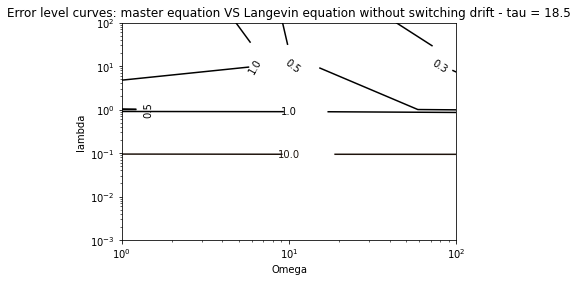

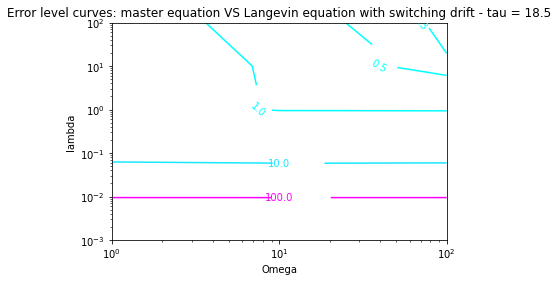

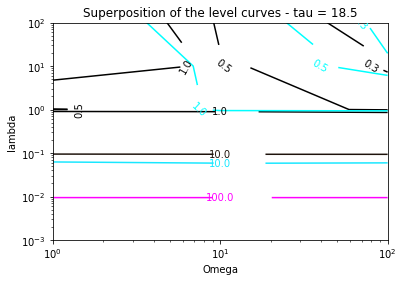

In [99]:
levels=[0.3, 0.5, 1, 10, 100]

for k in range(n_tau):
    
        print('tau=',val_tau[k])
        
        fig, ax1 = plt.subplots() 
        ax1.set_title('Error level curves: master equation VS Langevin equation without switching drift - tau = ' + str(val_tau[k])) 
        ax1.set_xlabel('Omega') 
        ax1.set_ylabel('lambda') 
        contours1=ax1.contour(val_Omega, val_lambda, abs(std_Pm[:,:,k] - std_Pl[:,:,k]), cmap = 'copper', levels=levels)
        ax1.tick_params(axis ='y') 
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax1.clabel(contours1,inline=1, fontsize=10)
        plt.savefig('plot_level_curve_std_Pm_vs_Pl - tau' + str(val_tau[k]) + '.pdf')
        plt.show()
        
        fig, ax1 = plt.subplots() 
        ax1.set_title('Error level curves: master equation VS Langevin equation with switching drift - tau = ' + str(val_tau[k])) 
        ax1.set_xlabel('Omega') 
        ax1.set_ylabel('lambda') 
        contours1=ax1.contour(val_Omega, val_lambda, abs(std_Pm[:,:,k] - std_Pln[:,:,k]), cmap = 'cool', levels=levels)
        ax1.tick_params(axis ='y') 
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax1.clabel(contours1,inline=1, fontsize=10)
        plt.savefig('plot_level_curve_std_Pm_vs_Pln - tau' + str(val_tau[k]) + '.pdf')
        plt.show()
        
        fig, ax1 = plt.subplots() 
        ax1.set_title('Superposition of the level curves - tau = ' + str(val_tau[k])) 
        ax1.set_xlabel('Omega') 
        ax1.set_ylabel('lambda') 
        contours1=ax1.contour(val_Omega, val_lambda, abs(std_Pm[:,:,k] - std_Pl[:,:,k]), cmap = 'copper', levels=levels)
        contours2=ax1.contour(val_Omega, val_lambda, abs(std_Pm[:,:,k] - std_Pln[:,:,k]), cmap = 'cool', levels=levels)
        ax1.tick_params(axis ='y') 
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax1.clabel(contours1,inline=1, fontsize=10)
        ax1.clabel(contours2,inline=1, fontsize=10)
        plt.savefig('plot_level_curve_std_superposition_P - tau' + str(val_tau[k]) + '.pdf')
        plt.show()

#### Plot power spectra

lambda= 0.001
Omega= 1
tau= 0.001


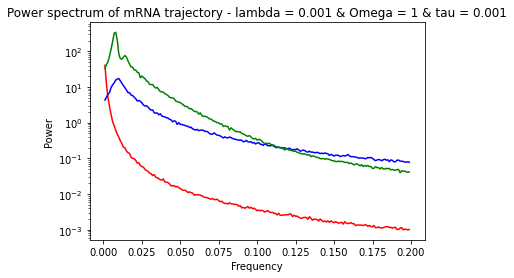

lambda= 0.001
Omega= 1
tau= 18.5


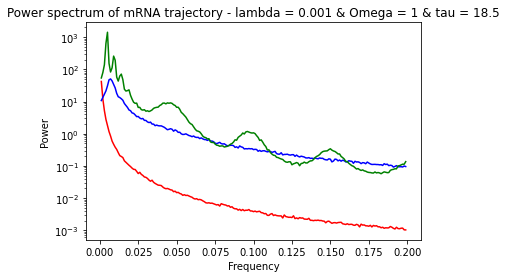

lambda= 0.001
Omega= 1
tau= 100


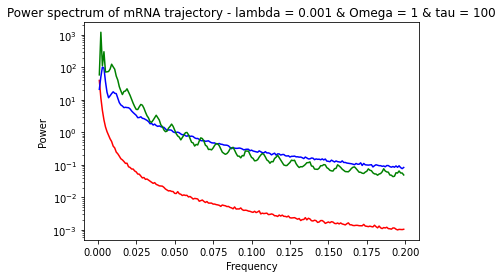

lambda= 0.01
Omega= 1
tau= 0.001


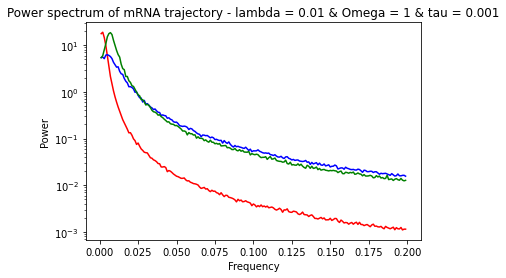

lambda= 0.01
Omega= 1
tau= 18.5


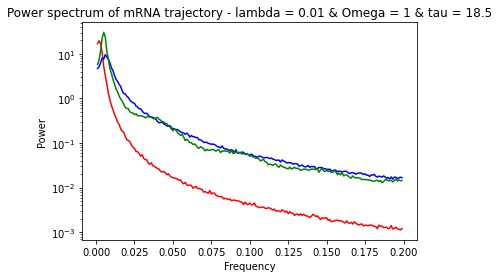

lambda= 0.01
Omega= 1
tau= 100


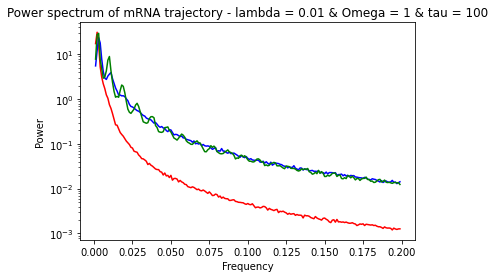

lambda= 0.1
Omega= 1
tau= 0.001


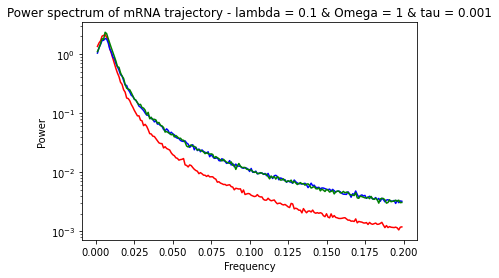

lambda= 0.1
Omega= 1
tau= 18.5


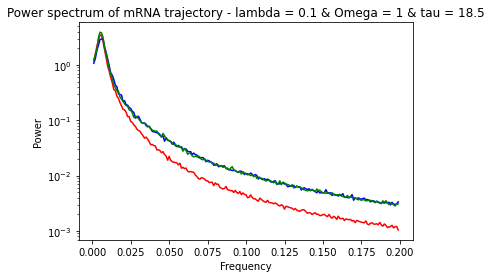

lambda= 0.1
Omega= 1
tau= 100


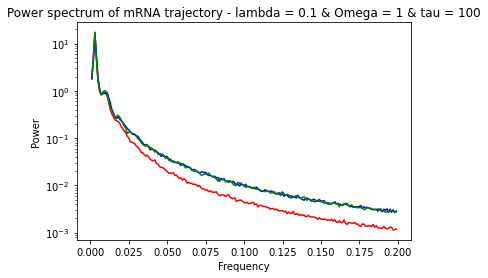

lambda= 1
Omega= 1
tau= 0.001


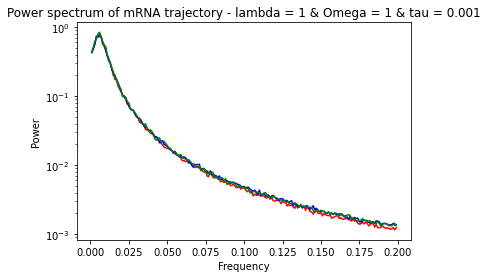

lambda= 1
Omega= 1
tau= 18.5


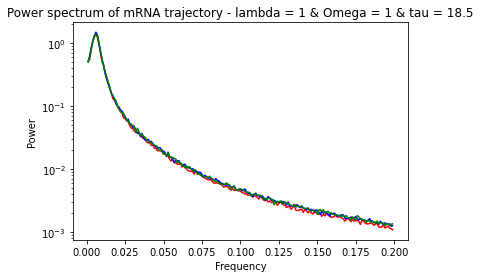

lambda= 1
Omega= 1
tau= 100


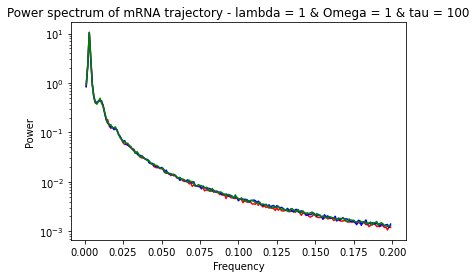

lambda= 10
Omega= 1
tau= 0.001


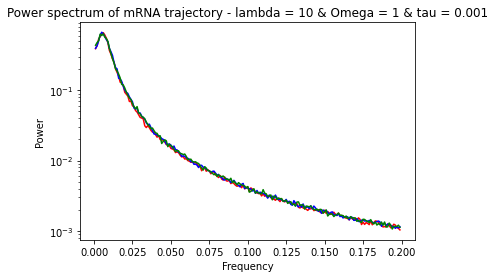

lambda= 10
Omega= 1
tau= 18.5


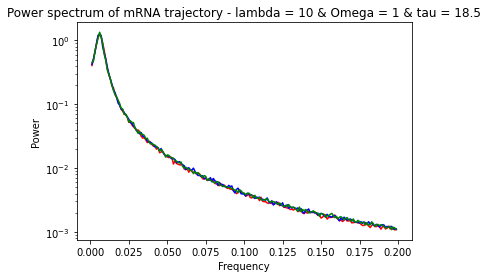

lambda= 10
Omega= 1
tau= 100


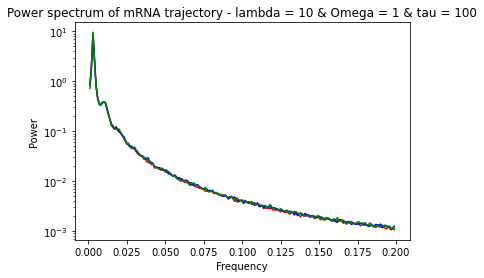

lambda= 100
Omega= 1
tau= 0.001


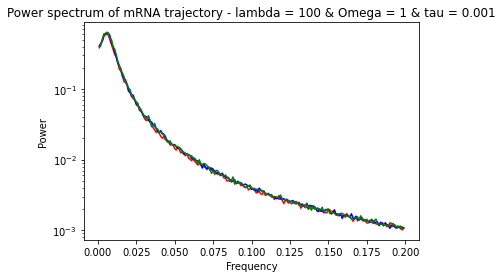

lambda= 100
Omega= 1
tau= 18.5


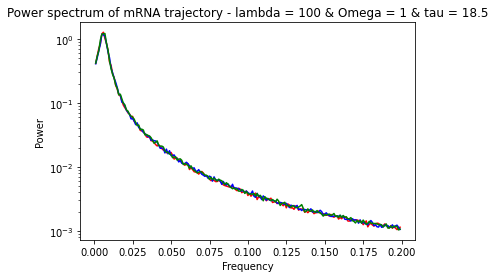

lambda= 100
Omega= 1
tau= 100


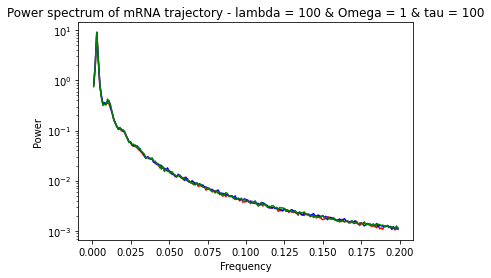

In [35]:
for i in range(n_lambda):
    for j in range(n_Omega):
        for k in range(n_tau):
        
            print('lambda=',val_lambda[i])    
            print('Omega=',val_Omega[j])
            print('tau=',val_tau[k])

            fig, ax1 = plt.subplots() 

            ax1.set_title('Power spectrum of mRNA trajectory - lambda = ' + str(val_lambda[i]) + ' & Omega = ' +  str(val_Omega[j]) + ' & tau = ' + str(val_tau[k])) 
            ax1.set_xlabel('Frequency') 
            ax1.set_ylabel('Power') 

            ax1.plot(omega_ref[1:200], power_spectrum_Mm[i,j,k][1:200], color = 'red') 
            ax1.plot(omega_ref[1:200], power_spectrum_Ml[i,j,k][1:200], color = 'blue') 
            ax1.plot(omega_ref[1:200], power_spectrum_Mln[i,j,k][1:200], color = 'green')

            ax1.tick_params(axis ='y') 
            ax1.set_yscale('log')        

            #ax1.set_xlim(0, 0.04)
            #ax1.set_ylim(0.0001, 1000)
            
            plt.savefig('plot_power_spectrum_M - lambda' + str(val_lambda[i]) + 'and Omega' +  str(val_Omega[j]) + ' and tau' + str(val_tau[k]) + '.pdf')  

            plt.show()

lambda= 0.001
Omega= 1
tau= 0.001


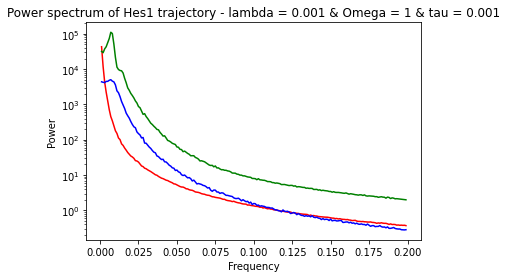

lambda= 0.001
Omega= 1
tau= 18.5


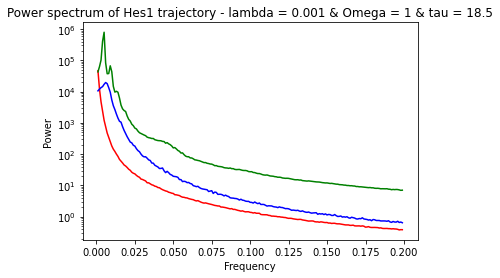

lambda= 0.01
Omega= 1
tau= 0.001


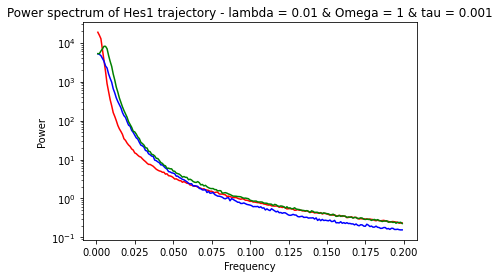

lambda= 0.01
Omega= 1
tau= 18.5


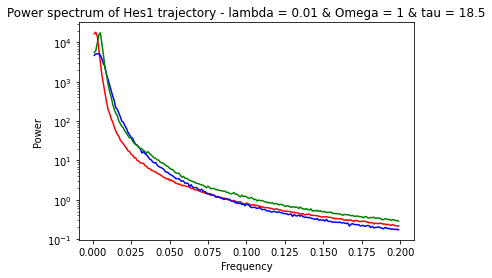

lambda= 0.1
Omega= 1
tau= 0.001


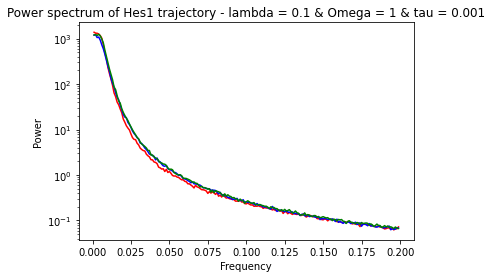

lambda= 0.1
Omega= 1
tau= 18.5


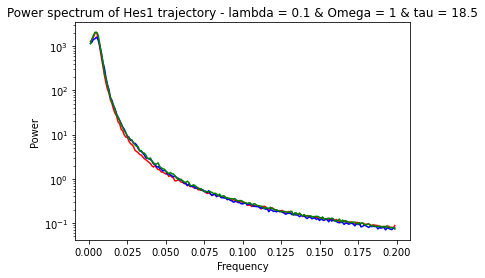

lambda= 1
Omega= 1
tau= 0.001


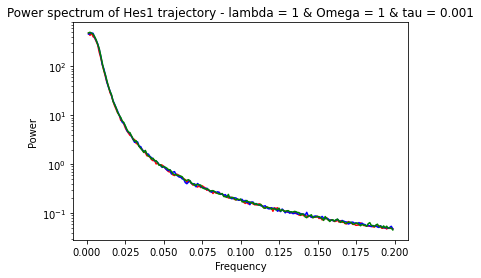

lambda= 1
Omega= 1
tau= 18.5


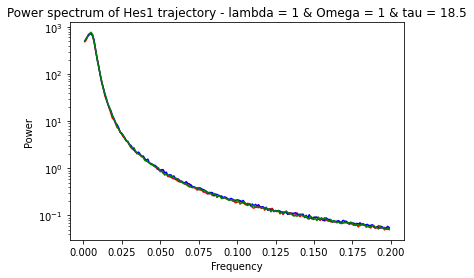

lambda= 10
Omega= 1
tau= 0.001


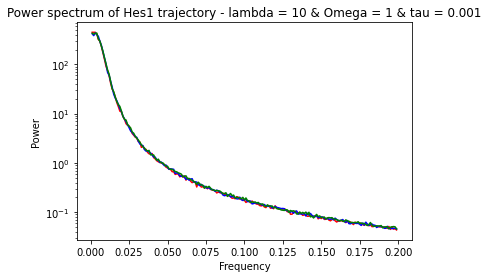

lambda= 10
Omega= 1
tau= 18.5


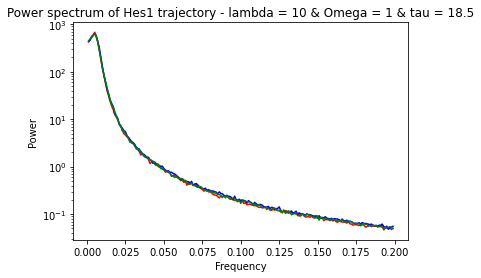

lambda= 100
Omega= 1
tau= 0.001


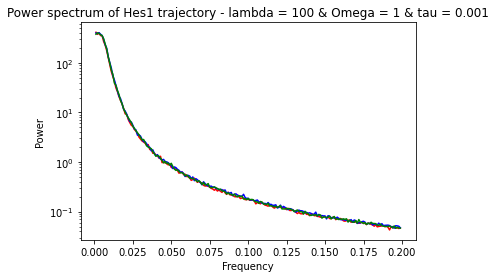

lambda= 100
Omega= 1
tau= 18.5


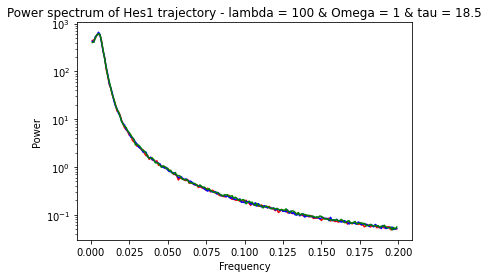

In [14]:
for i in range(n_lambda):
    for j in range(n_Omega):
        for k in range(n_tau):
        
            print('lambda=',val_lambda[i])    
            print('Omega=',val_Omega[j])
            print('tau=',val_tau[k])

            fig, ax1 = plt.subplots() 

            ax1.set_title('Power spectrum of Hes1 trajectory - lambda = ' + str(val_lambda[i]) + ' & Omega = ' +  str(val_Omega[j]) + ' & tau = ' + str(val_tau[k])) 
            ax1.set_xlabel('Frequency') 
            ax1.set_ylabel('Power') 

            ax1.plot(omega_ref[1:200], power_spectrum_Pm[i,j,k][1:200], color = 'red') 
            ax1.plot(omega_ref[1:200], power_spectrum_Pl[i,j,k][1:200], color = 'blue') 
            ax1.plot(omega_ref[1:200], power_spectrum_Pln[i,j,k][1:200], color = 'green')

            ax1.tick_params(axis ='y') 
            ax1.set_yscale('log')        

            #ax1.set_xlim(-0.04, 0.04)
            #ax1.set_ylim(0.01, 1000000)
            
            plt.savefig('plot_power_spectrum_P - lambda' + str(val_lambda[i]) + 'and Omega' +  str(val_Omega[j]) + ' and tau' + str(val_tau[k]) + '.pdf')  

            plt.show()

#### Plot power spectrum in LNA

lambda= 0.001
Omega= 1
tau= 0.001


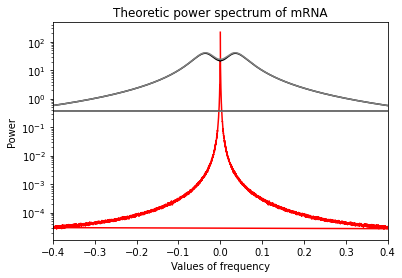

lambda= 0.001
Omega= 1
tau= 18.5


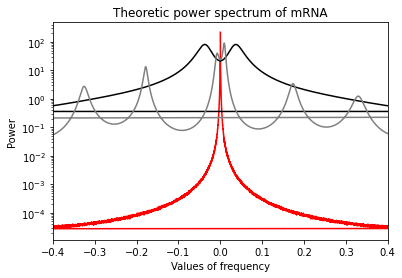

lambda= 0.001
Omega= 10
tau= 0.001


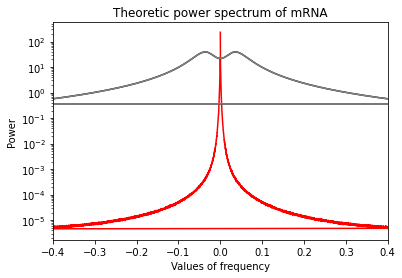

lambda= 0.001
Omega= 10
tau= 18.5


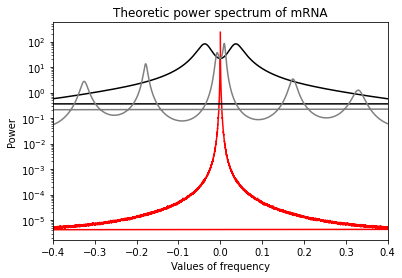

lambda= 0.001
Omega= 100
tau= 0.001


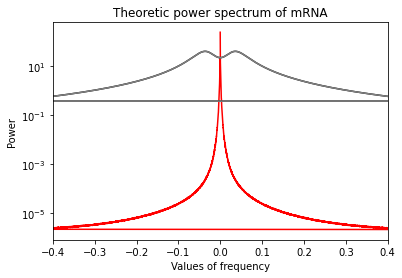

lambda= 0.001
Omega= 100
tau= 18.5


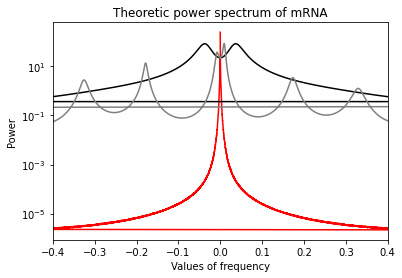

lambda= 0.01
Omega= 1
tau= 0.001


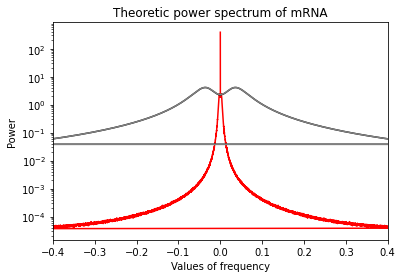

lambda= 0.01
Omega= 1
tau= 18.5


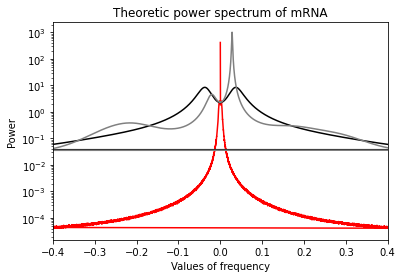

lambda= 0.01
Omega= 10
tau= 0.001


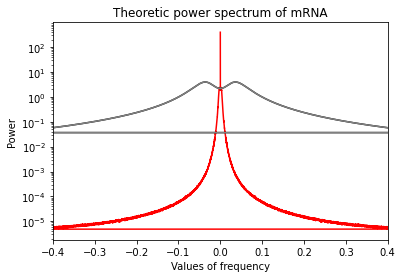

lambda= 0.01
Omega= 10
tau= 18.5


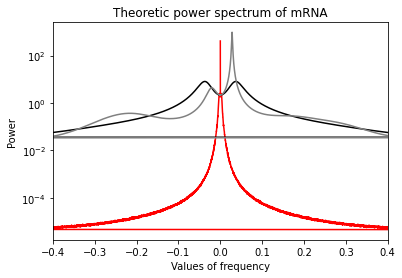

lambda= 0.01
Omega= 100
tau= 0.001


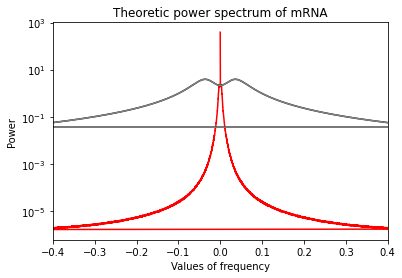

lambda= 0.01
Omega= 100
tau= 18.5


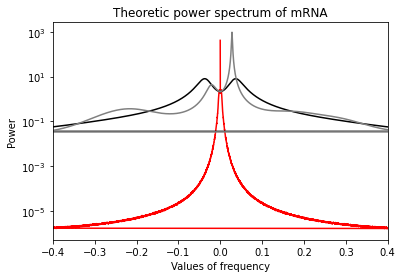

lambda= 0.1
Omega= 1
tau= 0.001


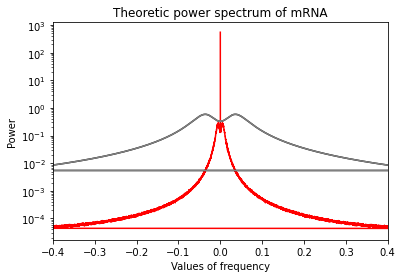

lambda= 0.1
Omega= 1
tau= 18.5


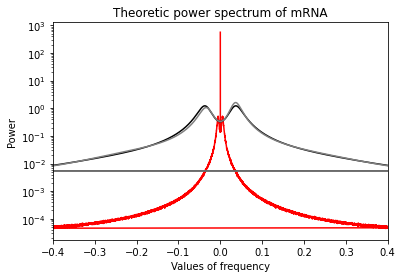

lambda= 0.1
Omega= 10
tau= 0.001


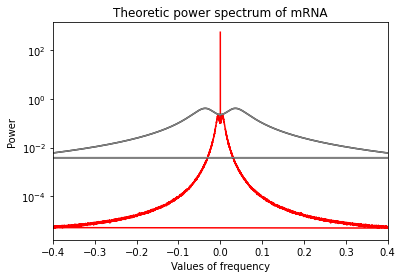

lambda= 0.1
Omega= 10
tau= 18.5


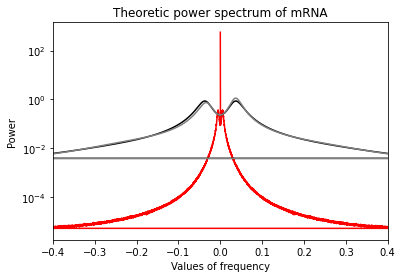

lambda= 0.1
Omega= 100
tau= 0.001


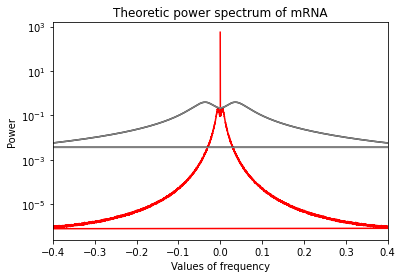

lambda= 0.1
Omega= 100
tau= 18.5


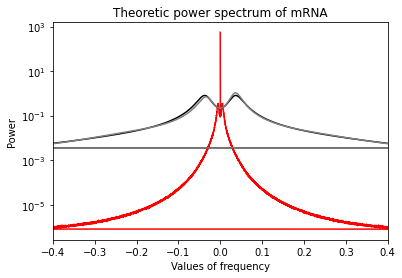

lambda= 1
Omega= 1
tau= 0.001


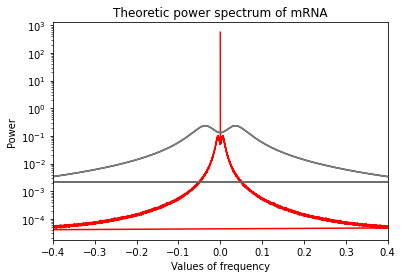

lambda= 1
Omega= 1
tau= 18.5


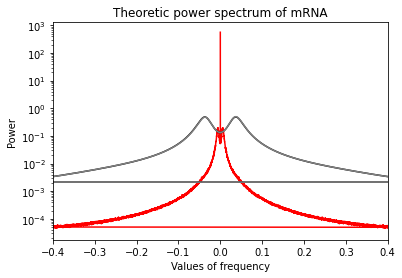

lambda= 1
Omega= 10
tau= 0.001


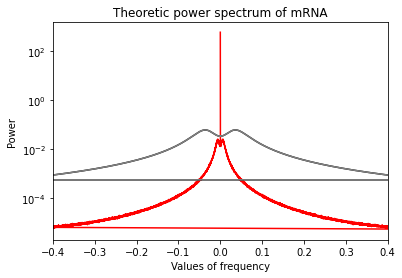

lambda= 1
Omega= 10
tau= 18.5


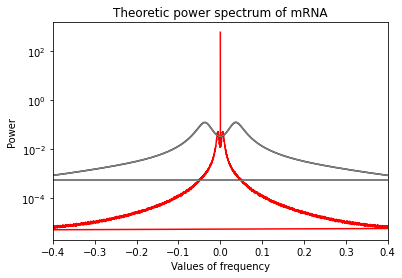

lambda= 1
Omega= 100
tau= 0.001


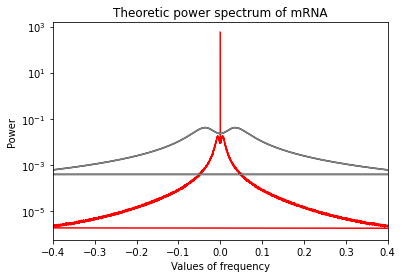

lambda= 1
Omega= 100
tau= 18.5


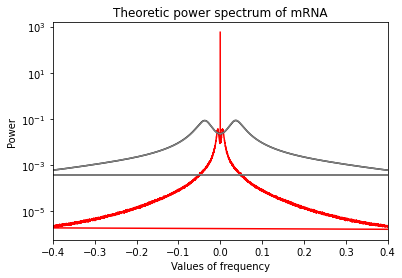

lambda= 10
Omega= 1
tau= 0.001


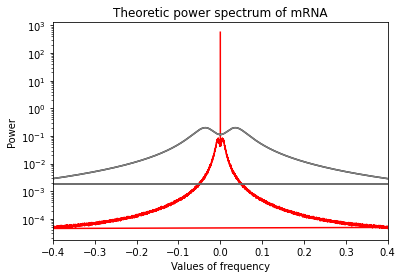

lambda= 10
Omega= 1
tau= 18.5


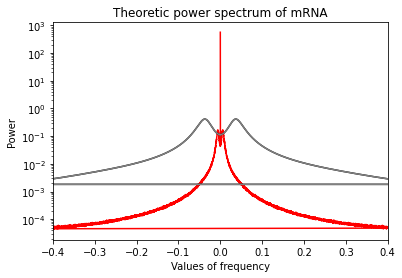

lambda= 10
Omega= 10
tau= 0.001


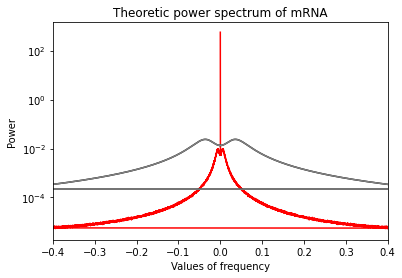

lambda= 10
Omega= 10
tau= 18.5


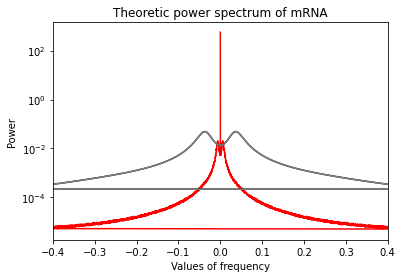

lambda= 10
Omega= 100
tau= 0.001


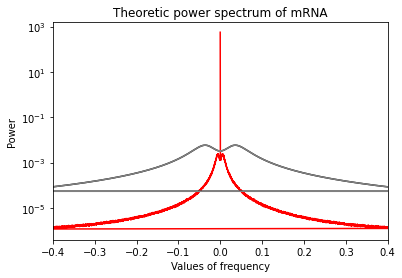

lambda= 10
Omega= 100
tau= 18.5


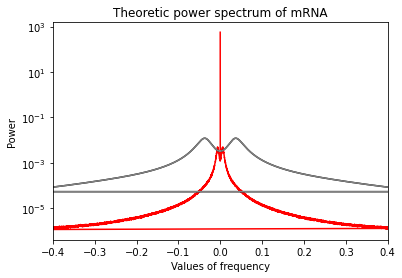

lambda= 100
Omega= 1
tau= 0.001


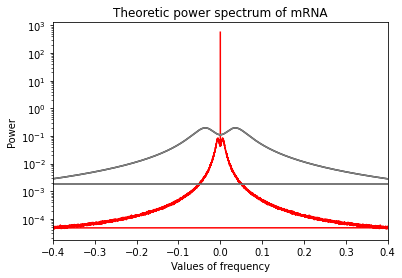

lambda= 100
Omega= 1
tau= 18.5


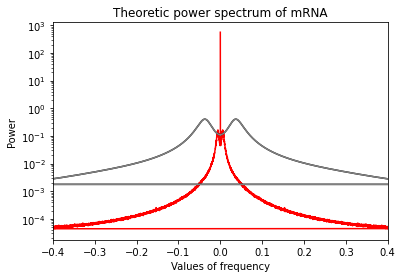

lambda= 100
Omega= 10
tau= 0.001


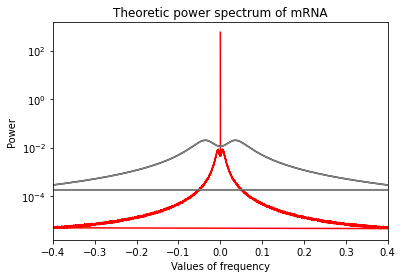

lambda= 100
Omega= 10
tau= 18.5


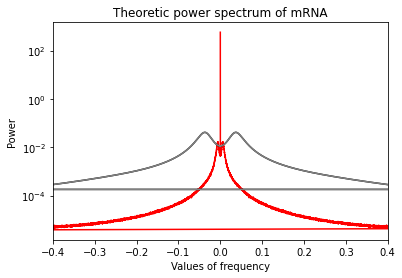

lambda= 100
Omega= 100
tau= 0.001


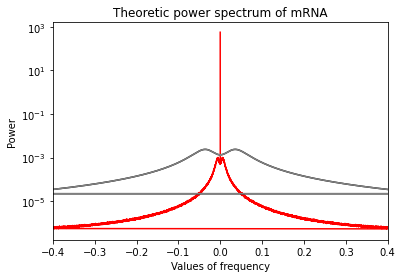

lambda= 100
Omega= 100
tau= 18.5


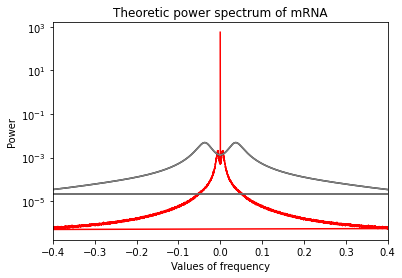

In [108]:
T=8000
delta_t=1
n_t=int(T/delta_t)
omega_ref=np.fft.fftfreq(n_t,d=delta_t)

for i in range(n_lambda):
    for j in range(n_Omega):
        for k in range(n_tau):
            print('lambda=',val_lambda[i])
            print('Omega=',val_Omega[j])    
            print('tau=',val_tau[k])
            
            fig, ax1 = plt.subplots() 

            ax1.set_title('Theoretic power spectrum of mRNA')
            ax1.set_xlabel('Values of frequency') 
            ax1.set_ylabel('Power') 

            Sm,Sp=utils.theoretic_power_spectrum(lambda_s=val_lambda[i],P_0=1000,tau=val_tau[k],Omega=val_Omega[j],T=T,delta_t=1)
            Smn,Spn=utils.theoretic_power_spectrum(lambda_s=val_lambda[i],P_0=1000,tau=val_tau[k],Omega=val_Omega[j],T=T,delta_t=1,drift="new")
            
            ax1.plot(omega_ref, power_spectrum_Mm[i,j,k], color = 'red') 
            ax1.plot(omega_ref, Sm, color = 'black')
            ax1.plot(omega_ref, Smn, color = 'grey')

            ax1.tick_params(axis ='y') 
            ax1.set_yscale('log')        

            ax1.set_xlim(-0.4, 0.4)
            #ax1.set_ylim(0, 300)

            plt.show()

lambda= 0.001
tau= 0.001


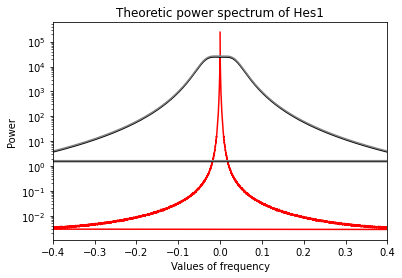

lambda= 0.001
tau= 18.5


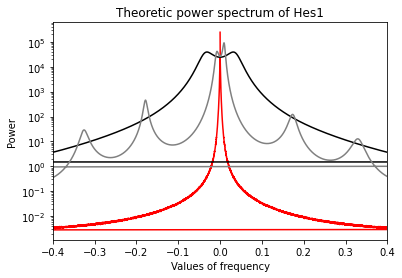

lambda= 0.001
tau= 0.001


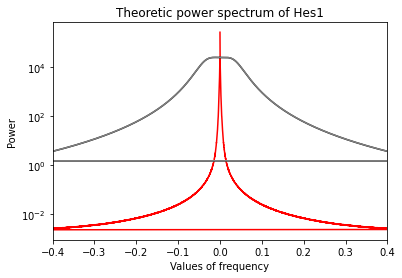

lambda= 0.001
tau= 18.5


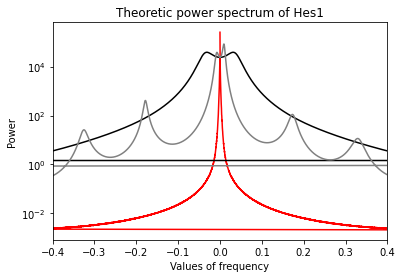

lambda= 0.001
tau= 0.001


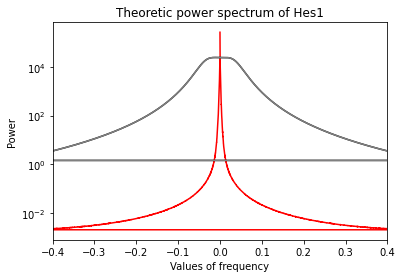

lambda= 0.001
tau= 18.5


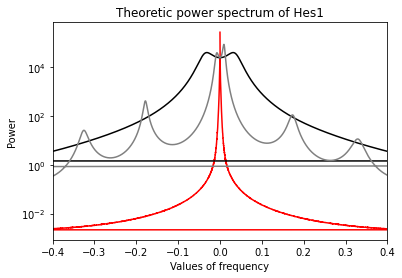

lambda= 0.01
tau= 0.001


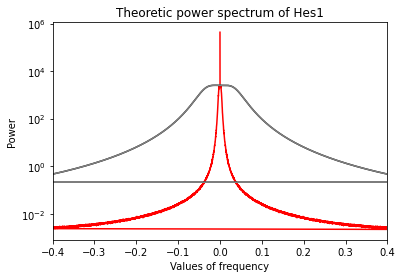

lambda= 0.01
tau= 18.5


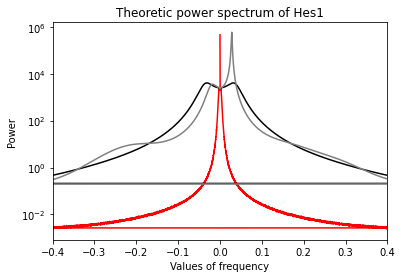

lambda= 0.01
tau= 0.001


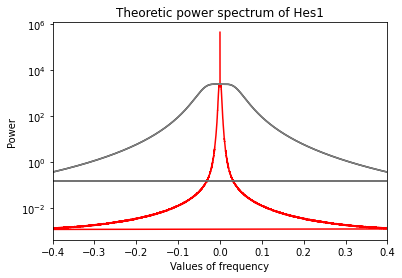

lambda= 0.01
tau= 18.5


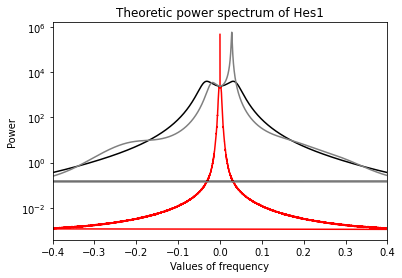

lambda= 0.01
tau= 0.001


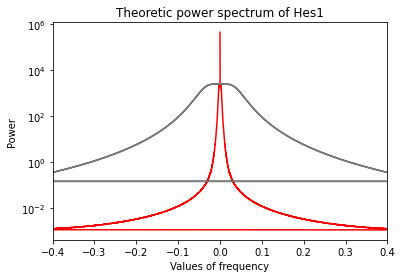

lambda= 0.01
tau= 18.5


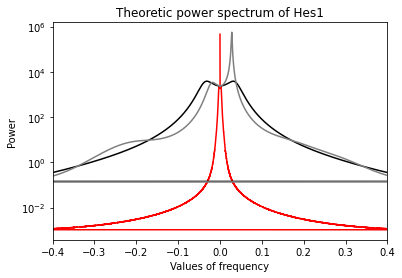

lambda= 0.1
tau= 0.001


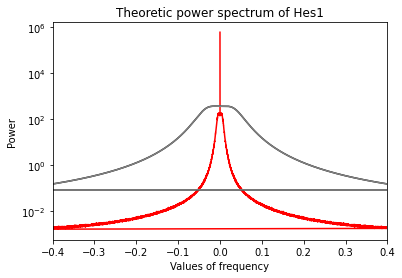

lambda= 0.1
tau= 18.5


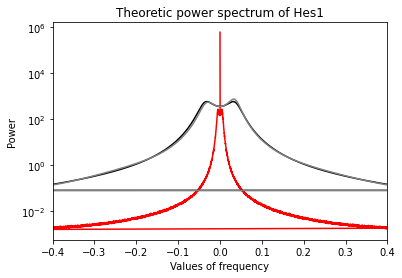

lambda= 0.1
tau= 0.001


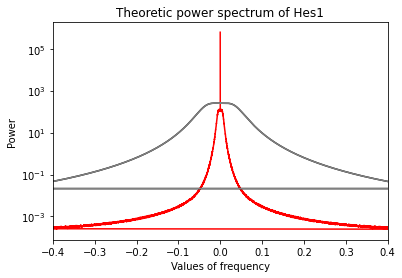

lambda= 0.1
tau= 18.5


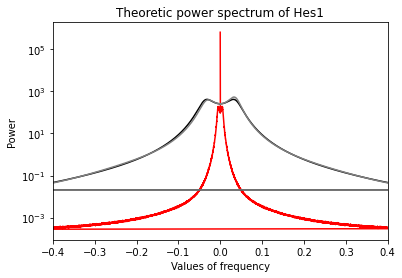

lambda= 0.1
tau= 0.001


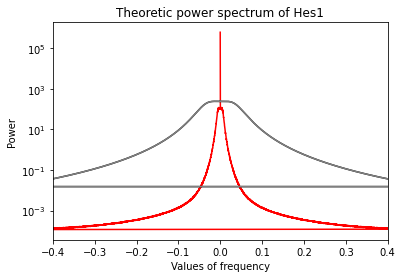

lambda= 0.1
tau= 18.5


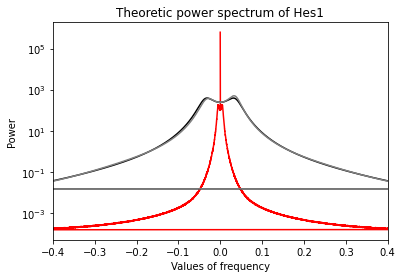

lambda= 1
tau= 0.001


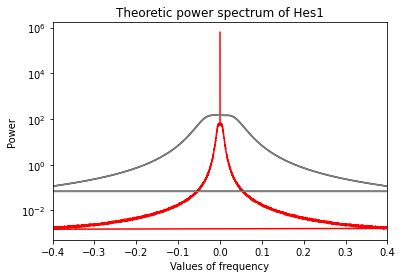

lambda= 1
tau= 18.5


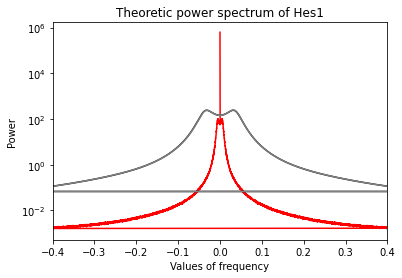

lambda= 1
tau= 0.001


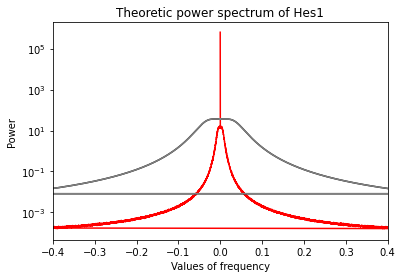

lambda= 1
tau= 18.5


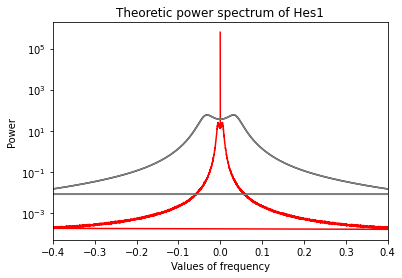

lambda= 1
tau= 0.001


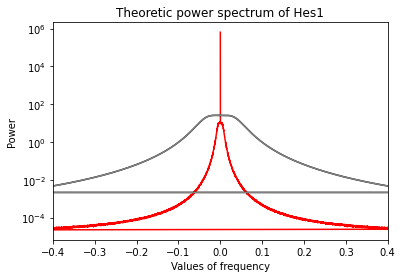

lambda= 1
tau= 18.5


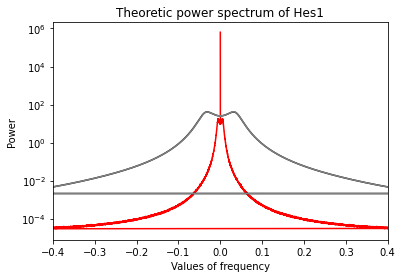

lambda= 10
tau= 0.001


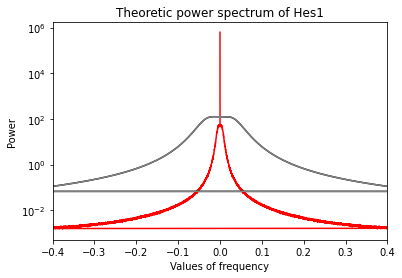

lambda= 10
tau= 18.5


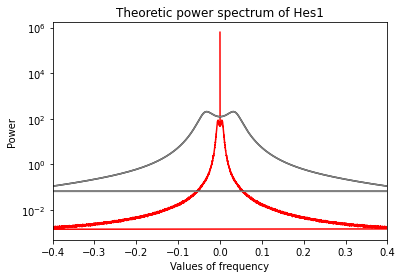

lambda= 10
tau= 0.001


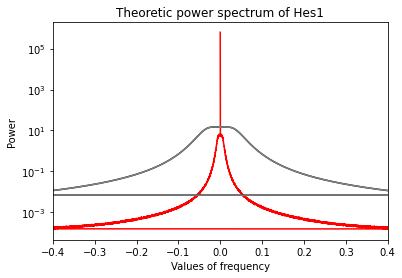

lambda= 10
tau= 18.5


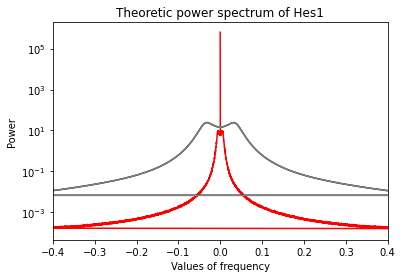

lambda= 10
tau= 0.001


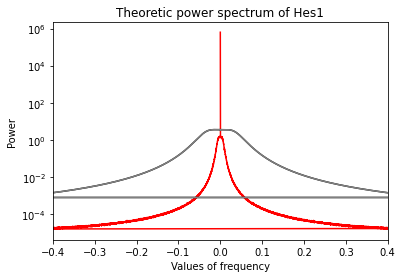

lambda= 10
tau= 18.5


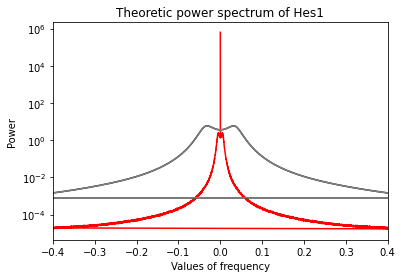

lambda= 100
tau= 0.001


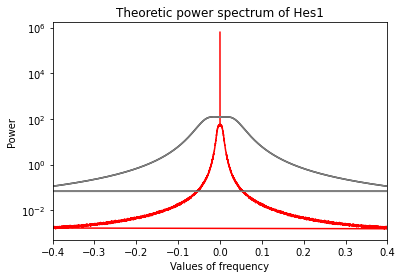

lambda= 100
tau= 18.5


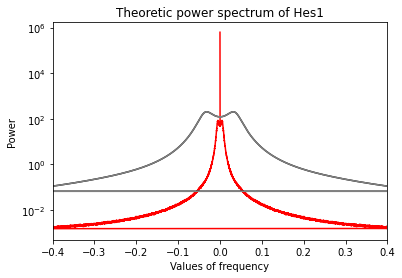

lambda= 100
tau= 0.001


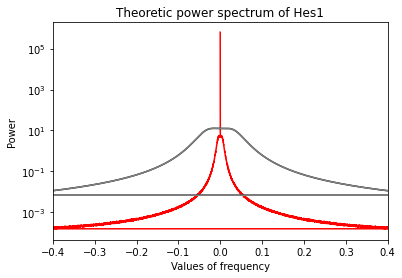

lambda= 100
tau= 18.5


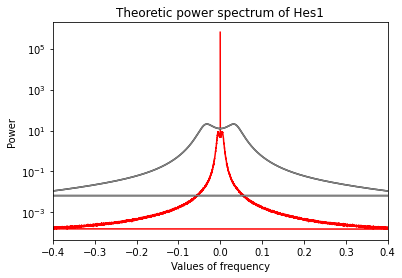

lambda= 100
tau= 0.001


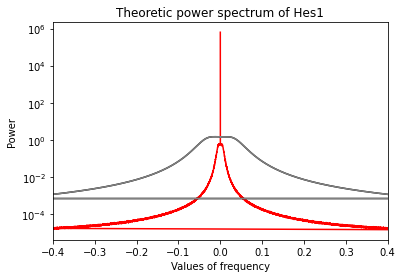

lambda= 100
tau= 18.5


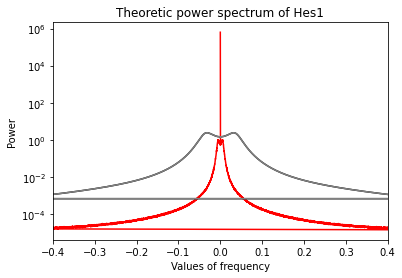

In [109]:
for i in range(n_lambda):
    for j in range(n_Omega):
        for k in range(n_tau):
            print('lambda=',val_lambda[i])    
            print('tau=',val_tau[k])
            
            fig, ax1 = plt.subplots() 

            ax1.set_title('Theoretic power spectrum of Hes1')
            ax1.set_xlabel('Values of frequency') 
            ax1.set_ylabel('Power') 

            Sm,Sp=utils.theoretic_power_spectrum(lambda_s=val_lambda[i],P_0=1000,tau=val_tau[k],Omega=val_Omega[j],T=T,delta_t=1)
            Smn,Spn=utils.theoretic_power_spectrum(lambda_s=val_lambda[i],P_0=1000,tau=val_tau[k],Omega=val_Omega[j],T=T,delta_t=1,drift="new")
            
            ax1.plot(omega_ref, power_spectrum_Pm[i,j,k], color = 'red') 
            ax1.plot(omega_ref, Sp, color = 'black')
            ax1.plot(omega_ref, Spn, color = 'grey')

            ax1.tick_params(axis ='y') 
            ax1.set_yscale('log')        

            ax1.set_xlim(-0.4, 0.4)
            #ax1.set_ylim(0, 300)

            plt.show()

### Computation time

In [10]:
times_m=np.zeros((n_lambda,n_Omega,n_tau))
times_l=np.zeros((n_lambda,n_Omega,n_tau))
times_ln=np.zeros((n_lambda,n_Omega,n_tau))


for i in range(n_lambda):
    for j in range(n_Omega):
        for k in range(n_tau):
            t0=time.time()
            
            tm,Mm,Pm=master.one_trajectory(tau=val_tau[k],lambda_s=val_lambda[i],Omega=val_Omega[j],P_0=100)
            t1=time.time()
            
            tl,Ml,Pl=langevin.one_trajectory(tau=val_tau[k],lambda_s=val_lambda[i],Omega=val_Omega[j],P_0=100)
            t2=time.time()
            
            tl,Ml,Pl=langevin.one_trajectory(tau=val_tau[k],lambda_s=val_lambda[i],Omega=val_Omega[j],P_0=100,drift="new")
            t3=time.time()
            
            times_m[i,j,k] = t1-t0
            times_l[i,j,k] = t2-t1
            times_ln[i,j,k] = t3-t2

            
print('master: ', times_m)
print('\n')
print('langevin: ',times_l)
print('\n')
print('langevin & new drift: ',times_ln)

master:  [[[0.00200582 0.0009985  0.        ]]

 [[0.00198531 0.00200033 0.00300097]]

 [[0.002002   0.00200057 0.00300121]]

 [[0.00200248 0.00200129 0.00200081]]

 [[0.00300002 0.00400186 0.00300074]]

 [[0.02501297 0.02599931 0.01998544]]]


langevin:  [[[0.00098753 0.         0.        ]]

 [[0.         0.         0.        ]]

 [[0.         0.         0.        ]]

 [[0.00099564 0.         0.00100017]]

 [[0.         0.         0.00099993]]

 [[0.00100017 0.         0.        ]]]


langevin & new drift:  [[[0.         0.00101471 0.        ]]

 [[0.         0.         0.        ]]

 [[0.         0.         0.        ]]

 [[0.         0.         0.        ]]

 [[0.         0.00099993 0.        ]]

 [[0.         0.001019   0.00101948]]]
